In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df = pd.concat([df_2000, df_2001])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.10,2373.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.00,0.0,NaN
1362,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.00,0.0,NaN
1363,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.00,0.0,NR
1364,tt9071078,0.0,/51274Q2vnmajonyiqq3YNQQ7q4I.jpg,NaN,127389.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://movie.douban.com/subject/26420865/,1044371.0,zh,魔忍狂刀,...,0.0,100.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Dragon Hero,Dragon Hero,0.0,0.00,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 0 to 1365
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2630 non-null   object 
 1   adult                  2628 non-null   float64
 2   backdrop_path          1474 non-null   object 
 3   belongs_to_collection  219 non-null    object 
 4   budget                 2628 non-null   float64
 5   genres                 2628 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2628 non-null   float64
 8   original_language      2628 non-null   object 
 9   original_title         2628 non-null   object 
 10  overview               2576 non-null   object 
 11  popularity             2628 non-null   float64
 12  poster_path            2388 non-null   object 
 13  production_companies   2628 non-null   object 
 14  production_countries   2628 non-null   object 
 15  release_d

In [5]:
# getting revenue and bubget greater than 0
valid_financial = df[(df['revenue'] > 0) | (df['budget'] > 0)]
valid_financial

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.100,2373.0,PG
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.078,193.0,R
10,tt0120202,0.0,/tuerGhZ1lA8wpBjUCEUpeTWDT5B.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.newline.com/properties/stateandmain...,21991.0,en,State and Main,...,9206279.0,106.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,Big movie. Small town. Huge trouble.,State and Main,0.0,6.327,185.0,NaN
11,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,99.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,249.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.600,15.0,NaN
1323,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN
1338,tt2957918,0.0,NaN,NaN,2000.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,602589.0,en,Toaster,...,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Now is not the time for toast.,Toaster,0.0,0.000,0.0,NaN
1344,tt3314212,0.0,NaN,NaN,250000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,1182321.0,en,A Letter from My Father,...,0.0,75.0,[],Released,NaN,A Letter from My Father,0.0,0.000,0.0,NaN


In [6]:
print(f'Movies with valid financial informaion: {len(valid_financial)}')

Movies with valid financial informaion: 650


In [7]:
# saving value counts for certificate
valid_financial['certification'].value_counts()

certification
R        228
PG-13    133
PG        36
NR        22
G         15
Name: count, dtype: int64

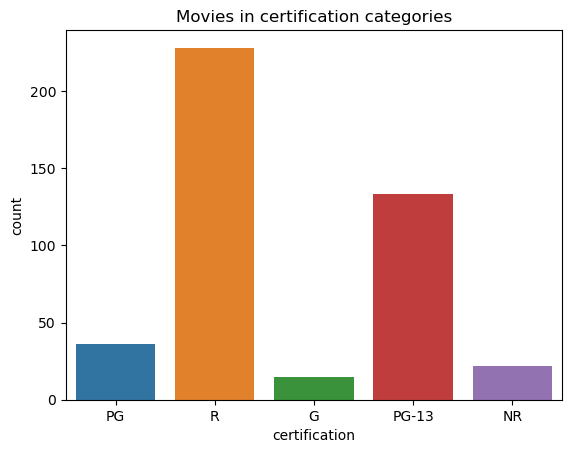

In [8]:
# Plot value counts as a bar graph
ax=sns.countplot(data=valid_financial,x='certification')
ax.set_title('Movies in certification categories');

In [10]:
avg_revenue = valid_financial.groupby('certification')['revenue'].mean()
avg_revenue

certification
G        1.173648e+08
NR       1.614227e+07
PG       1.077297e+08
PG-13    9.854219e+07
R        3.041826e+07
Name: revenue, dtype: float64

In [11]:
avg_revenue = valid_financial.groupby('certification')['budget'].mean()
avg_revenue

certification
G        3.813333e+07
NR       8.798959e+06
PG       4.402770e+07
PG-13    4.332450e+07
R        1.843028e+07
Name: budget, dtype: float64

In [12]:
df.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip',index=False)